In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/drive/MyDrive/DBMS/Index/train.csv")
df


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50877,50878,C4,845,Rented,Individual,22,22,No,X3,NaN,NaN,18,7704.0,0
50878,50879,C5,4188,Rented,Individual,27,27,No,X3,7.0,3.0,4,5408.0,0
50879,50880,C1,442,Rented,Individual,63,63,No,X2,14+,1.0,12,11374.0,0
50880,50881,C1,4,Owned,Joint,71,49,No,X2,2.0,2.0,16,28179.2,1


In [4]:
df.dtypes

,0
ID,int64
City_Code,object
Region_Code,int64
Accomodation_Type,object
Reco_Insurance_Type,object
Upper_Age,int64
Lower_Age,int64
Is_Spouse,object
Health Indicator,object
Holding_Policy_Duration,object


In [5]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,1,2,3,4,5,6,7,8,9,10
City_Code,C3,C5,C5,C24,C8,C9,C3,C1,C15,C1
Region_Code,3213,1117,3732,4378,2190,1785,679,3175,3497,530
Accomodation_Type,Rented,Owned,Owned,Owned,Rented,Rented,Owned,Owned,Owned,Owned
Reco_Insurance_Type,Individual,Joint,Individual,Joint,Individual,Individual,Individual,Joint,Joint,Joint
Upper_Age,36,75,32,52,44,52,28,75,52,59
Lower_Age,36,22,32,48,44,52,28,73,43,26
Is_Spouse,No,No,No,No,No,No,No,Yes,No,Yes
Health Indicator,X1,X2,NaN,X1,X2,X2,NaN,X4,X1,NaN
Holding_Policy_Duration,14+,NaN,1.0,14+,3.0,5.0,NaN,9.0,14.0,7.0


In [6]:
for col in df.select_dtypes(include=['object']).columns:
    unique_vals = df[col].unique()
    print(f"Column '{col}' ({len(unique_vals)} unique values):")
    print(unique_vals)
    print("-" * 50)

Column 'City_Code' (36 unique values):
['C3' 'C5' 'C24' 'C8' 'C9' 'C1' 'C15' 'C28' 'C27' 'C7' 'C20' 'C25' 'C4'
 'C2' 'C34' 'C10' 'C17' 'C18' 'C16' 'C29' 'C33' 'C26' 'C19' 'C6' 'C12'
 'C13' 'C11' 'C14' 'C22' 'C23' 'C21' 'C36' 'C32' 'C30' 'C35' 'C31']
--------------------------------------------------
Column 'Accomodation_Type' (2 unique values):
['Rented' 'Owned']
--------------------------------------------------
Column 'Reco_Insurance_Type' (2 unique values):
['Individual' 'Joint']
--------------------------------------------------
Column 'Is_Spouse' (2 unique values):
['No' 'Yes']
--------------------------------------------------
Column 'Health Indicator' (10 unique values):
['X1' 'X2' nan 'X4' 'X3' 'X6' 'X5' 'X8' 'X7' 'X9']
--------------------------------------------------
Column 'Holding_Policy_Duration' (16 unique values):
['14+' nan '1.0' '3.0' '5.0' '9.0' '14.0' '7.0' '2.0' '11.0' '10.0' '8.0'
 '6.0' '4.0' '13.0' '12.0']
--------------------------------------------------


In [17]:
for col in df.columns:
   nan_count = df[col].isna().sum()
   total_missing= nan_count
   if total_missing:
        print(f"Column '{col}':  NaN = {nan_count}")

Column 'Health Indicator':  NaN = 11691
Column 'Holding_Policy_Duration':  NaN = 20251
Column 'Holding_Policy_Type':  NaN = 20251


In [39]:
missing_proportions = df_missing.isna().mean()
for col, prop in missing_proportions.items():
    if prop:
        print(f"Column '{col}': {prop:.2%} ")

Column 'Health Indicator': 22.98% 
Column 'Holding_Policy_Duration': 39.80% 
Column 'Holding_Policy_Type': 39.80% 


In [20]:
df = df.drop(['Holding_Policy_Type','Holding_Policy_Duration'], axis = 1)

In [21]:
df['Response'].value_counts()

,count
Response,
0,38673
1,12209


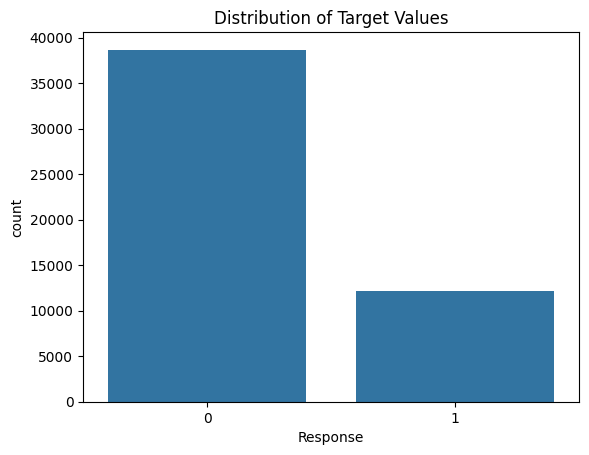

In [22]:
sns.countplot(x = "Response", data = df)
plt.title("Distribution of Target Values")
plt.show()

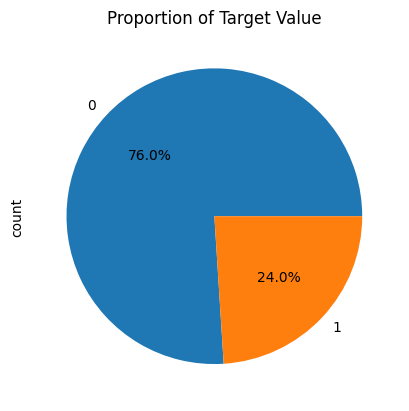

In [27]:
df.Response.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

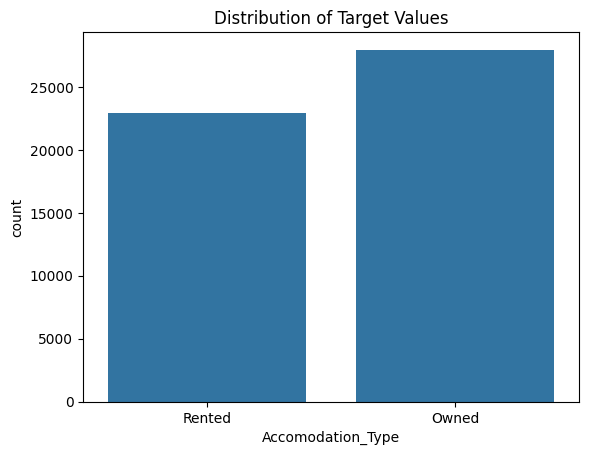

In [28]:
sns.countplot(x = "Accomodation_Type", data = df)
plt.title("Distribution of Target Values")
plt.show()

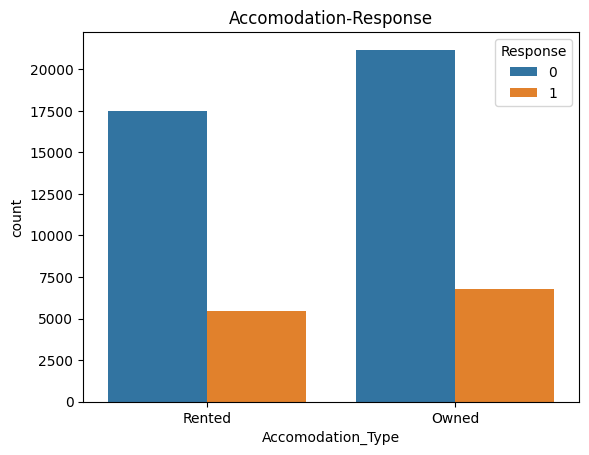

In [32]:
sns.countplot(x = "Accomodation_Type", hue = "Response", data = df)
plt.title("Accomodation-Response")
plt.show()

In [33]:
df['Reco_Insurance_Type']=df['Reco_Insurance_Type'].replace('Individual',0)
df['Reco_Insurance_Type']=df['Reco_Insurance_Type'].replace('Joint',1)
df['Accomodation_Type']=df['Accomodation_Type'].replace('Rented',0)
df['Accomodation_Type']=df['Accomodation_Type'].replace('Owned',1)
df['Is_Spouse']=df['Is_Spouse'].replace('No',0)
df['Is_Spouse']=df['Is_Spouse'].replace('Yes',1)

/tmp/ipython-input-451550955.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Reco_Insurance_Type']=df['Reco_Insurance_Type'].replace('Joint',1)
/tmp/ipython-input-451550955.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Accomodation_Type']=df['Accomodation_Type'].replace('Owned',1)
/tmp/ipython-input-451550955.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the 

Text(0.5, 1.0, 'Correlation Heatmap for Selected Numerical Features')

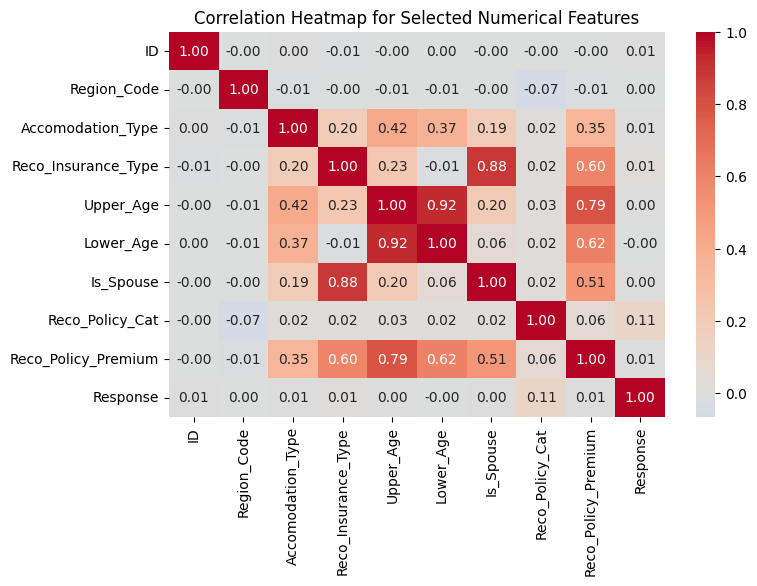

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
cols = ['ID','City_Code','Region_Code','Accomodation_Type','Reco_Insurance_Type','Upper_Age','Lower_Age','Is_Spouse','Health Indicator','Reco_Policy_Cat','Reco_Policy_Premium','Response']
numeric_cols = df[cols].select_dtypes(include=['number']).columns.tolist()
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Selected Numerical Features')


In [40]:
num_cols = df.select_dtypes(include=np.number).columns
num_cols

Index(['ID', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Reco_Policy_Cat',
       'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [42]:
SKEW_THRESHOLD = 2
KURT_THRESHOLD = 2
ZERO_RATIO_THRESHOLD = 0.10
df_transformed = df.copy()
stats_list = []
for col in num_cols:
    series = df_transformed[col]
    skew_before = series.skew()
    kurt_before = series.kurtosis()
    std_before = series.std()
    transform_type = "NA"
    transform_needed = "No"
    skew_after = skew_before
    kurt_after = kurt_before
    std_after = std_before
    if abs(skew_before) > SKEW_THRESHOLD and abs(kurt_before) > KURT_THRESHOLD:
        zero_ratio = (series == 0).mean()
        if zero_ratio <= ZERO_RATIO_THRESHOLD and (series > 0).all():
            transform_type = "log"
            df_transformed[col] = np.log(series)
        else:
            transform_type = "log1p"
            df_transformed[col] = np.log1p(series.clip(lower=0))  # avoids negatives
        transform_needed = "Yes"
        skew_after = df_transformed[col].skew()
        kurt_after = df_transformed[col].kurtosis()
        std_after = df_transformed[col].std()
    stats_list.append({"numeric_column": col,"skew_before": skew_before,"kurtosis_before": kurt_before,"std_before": std_before,"log_transform_needed": transform_needed,"log_type": transform_type,"skew_after": skew_after,"kurtosis_after": kurt_after,"std_after": std_after})
stat_df = pd.DataFrame(stats_list)
stat_df

,numeric_column,skew_before,kurtosis_before,std_before,log_transform_needed,log_type,skew_after,kurtosis_after,std_after
0,ID,0.000000,-1.200000,14688.512535,No,NA,0.000000,-1.200000,14688.512535
1,Region_Code,0.798096,-0.202240,1424.081652,No,NA,0.798096,-0.202240,1424.081652
2,Accomodation_Type,-0.198293,-1.960757,0.497566,No,NA,-0.198293,-1.960757,0.497566
3,Reco_Insurance_Type,1.474244,0.173401,0.402482,No,NA,1.474244,0.173401,0.402482
4,Upper_Age,0.217370,-1.233867,17.310271,No,NA,0.217370,-1.233867,17.310271
5,Lower_Age,0.330594,-1.170556,17.319375,No,NA,0.330594,-1.170556,17.319375
6,Is_Spouse,1.800028,1.240149,0.371653,No,NA,1.800028,1.240149,0.371653
7,Reco_Policy_Cat,-0.928224,-0.310533,6.340663,No,NA,-0.928224,-0.310533,6.340663
8,Reco_Policy_Premium,0.782463,0.423053,6590.074873,No,NA,0.782463,0.423053,6590.074873
9,Response,1.217936,-0.516653,0.427055,No,NA,1.217936,-0.516653,0.427055
